In [1]:
pwd # CTRL + SHIFT + - = 셀 

'C:\\Users\\Kosmo_24'

목표 : 레드와인, 화이트와인 구분하기
    
데이터 : UCI repository 데이터 
    - 6497개 행
    - 레드와인 1599개, 화이트 와인이 4896개
    - 13개 컬럼
    - 12개 feature : 주석산 농도, 아세트산 농도, 구연산 농도, 잔류 당분 농도, 염화나트륨 농도, 유리 아황산 농도, 총 아황산 농도,
                    밀도, PH, 황산칼륨 농도, 알코올 도수, 와인 맛(0~10등급)
    - class : 레드와인(1), 화이트와인(0)
    

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# seed값 설정

seed=0

np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# 데이터 입력

df_pre = pd.read_csv('c:/chosungeun/data/dataset/dataset/wine.csv', header=None)
df_pre

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [5]:
# 데이터 샘플링
df = df_pre.sample(frac=0.5) # 랜덤 샘플을 가져오는 50%만 가져오겠다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.18,0.24,3.40,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,0
5210,6.8,0.14,0.18,1.40,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,0
3518,7.3,0.22,0.50,13.70,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,6,0
1622,7.6,0.67,0.14,1.50,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,0
2443,7.3,0.21,0.29,1.60,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,5.9,0.26,0.30,1.00,0.036,38.0,114.0,0.99280,3.58,0.48,9.4,5,0
3561,8.2,0.21,0.48,1.40,0.041,11.0,99.0,0.99580,3.17,0.57,9.9,5,0
4805,6.6,0.29,0.39,6.75,0.031,22.0,98.0,0.99130,3.15,0.80,12.9,7,0
3045,6.3,0.27,0.49,1.20,0.063,35.0,92.0,0.99110,3.38,0.42,12.2,6,0


In [6]:
dataset = df.values
dataset

array([[ 6.3 ,  0.18,  0.24, ...,  9.2 ,  6.  ,  0.  ],
       [ 6.8 ,  0.14,  0.18, ..., 11.2 ,  6.  ,  0.  ],
       [ 7.3 ,  0.22,  0.5 , ...,  9.  ,  6.  ,  0.  ],
       ...,
       [ 6.6 ,  0.29,  0.39, ..., 12.9 ,  7.  ,  0.  ],
       [ 6.3 ,  0.27,  0.49, ..., 12.2 ,  6.  ,  0.  ],
       [ 7.3 ,  0.26,  0.49, ..., 10.8 ,  6.  ,  0.  ]])

In [7]:
X = dataset[:, 0:12] # 와인의 feature
Y = dataset[:, 12] # 레드(1)인지 화이트(0)인지

In [8]:
print(X.shape)
X

(3248, 12)


array([[ 6.3 ,  0.18,  0.24, ...,  0.52,  9.2 ,  6.  ],
       [ 6.8 ,  0.14,  0.18, ...,  0.54, 11.2 ,  6.  ],
       [ 7.3 ,  0.22,  0.5 , ...,  0.66,  9.  ,  6.  ],
       ...,
       [ 6.6 ,  0.29,  0.39, ...,  0.8 , 12.9 ,  7.  ],
       [ 6.3 ,  0.27,  0.49, ...,  0.42, 12.2 ,  6.  ],
       [ 7.3 ,  0.26,  0.49, ...,  0.54, 10.8 ,  6.  ]])

In [9]:
print(Y.shape)
Y

(3248,)


array([0., 0., 0., ..., 0., 0., 0.])

## 딥러닝 구조 짜기

In [10]:
# 모델 설정

model=Sequential()
model.add(Dense(32, input_dim=12, activation='relu')) # 인풋값(12), 히든레이어1
model.add(Dense(16, activation='relu'))               # 히든레이어2
model.add(Dense(8, activation='relu'))                # 히든레이어3
model.add(Dense(1, activation='sigmoid'))             # 아웃풋 레이어(이진 분류)


In [11]:
# 모델 컴파일

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 체크포인트 만들어서 모델 저장하기

In [12]:
# 모델 저장 폴더 설정
MODEL_DIR="./model/"

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정

modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# Earlystopping 설정

과적합 방지하려고 사용 / 
train set에만 overfitting된 모델을 만들지 않고 test set에도 잘 작동하는 모델을 만들기 위함.

In [13]:
# 학습 자동중단 설정

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [14]:
# 모델 실행

model.fit(X, Y, validation_split=0.2,
          epochs=500, batch_size=200, verbose=0,
          callbacks=[checkpointer, early_stopping_callback])


Epoch 00001: val_loss improved from inf to 0.71098, saving model to ./model/01-0.7110.hdf5

Epoch 00002: val_loss improved from 0.71098 to 0.42179, saving model to ./model/02-0.4218.hdf5

Epoch 00003: val_loss improved from 0.42179 to 0.38133, saving model to ./model/03-0.3813.hdf5

Epoch 00004: val_loss improved from 0.38133 to 0.35995, saving model to ./model/04-0.3600.hdf5

Epoch 00005: val_loss improved from 0.35995 to 0.35093, saving model to ./model/05-0.3509.hdf5

Epoch 00006: val_loss improved from 0.35093 to 0.29700, saving model to ./model/06-0.2970.hdf5

Epoch 00007: val_loss improved from 0.29700 to 0.27305, saving model to ./model/07-0.2731.hdf5

Epoch 00008: val_loss did not improve from 0.27305

Epoch 00009: val_loss improved from 0.27305 to 0.24875, saving model to ./model/09-0.2488.hdf5

Epoch 00010: val_loss improved from 0.24875 to 0.24268, saving model to ./model/10-0.2427.hdf5

Epoch 00011: val_loss improved from 0.24268 to 0.23269, saving model to ./model/11-0.23


Epoch 00112: val_loss did not improve from 0.08955

Epoch 00113: val_loss did not improve from 0.08955

Epoch 00114: val_loss did not improve from 0.08955

Epoch 00115: val_loss improved from 0.08955 to 0.08716, saving model to ./model/115-0.0872.hdf5

Epoch 00116: val_loss improved from 0.08716 to 0.08629, saving model to ./model/116-0.0863.hdf5

Epoch 00117: val_loss improved from 0.08629 to 0.08539, saving model to ./model/117-0.0854.hdf5

Epoch 00118: val_loss did not improve from 0.08539

Epoch 00119: val_loss did not improve from 0.08539

Epoch 00120: val_loss improved from 0.08539 to 0.08433, saving model to ./model/120-0.0843.hdf5

Epoch 00121: val_loss did not improve from 0.08433

Epoch 00122: val_loss improved from 0.08433 to 0.08428, saving model to ./model/122-0.0843.hdf5

Epoch 00123: val_loss did not improve from 0.08428

Epoch 00124: val_loss improved from 0.08428 to 0.08327, saving model to ./model/124-0.0833.hdf5

Epoch 00125: val_loss did not improve from 0.08327

E

# 그래프로 테스트셋 오차, 학습셋 정확도 확인

In [15]:
history=model.fit(X,Y, validation_split=0.3, epochs=500, batch_size=200, verbose=1, callbacks=[checkpointer, early_stopping_callback])

Train on 2273 samples, validate on 975 samples
Epoch 1/500
2273/2273 [==============================] - 0s 8us/step - loss: 0.0448 - accuracy: 0.9837 - val_loss: 0.0618 - val_accuracy: 0.9764

Epoch 00001: val_loss improved from 0.07082 to 0.06182, saving model to ./model/01-0.0618.hdf5
Epoch 2/500
2273/2273 [==============================] - 0s 9us/step - loss: 0.0406 - accuracy: 0.9868 - val_loss: 0.0696 - val_accuracy: 0.9764

Epoch 00002: val_loss did not improve from 0.06182
Epoch 3/500
2273/2273 [==============================] - 0s 7us/step - loss: 0.0494 - accuracy: 0.9833 - val_loss: 0.0702 - val_accuracy: 0.9754

Epoch 00003: val_loss did not improve from 0.06182
Epoch 4/500
2273/2273 [==============================] - 0s 8us/step - loss: 0.0620 - accuracy: 0.9798 - val_loss: 0.0660 - val_accuracy: 0.9774

Epoch 00004: val_loss did not improve from 0.06182
Epoch 5/500
2273/2273 [==============================] - 0s 9us/step - loss: 0.0490 - accuracy: 0.9833 - val_loss: 0.0637

In [16]:
history.history

{'val_loss': [0.06182038440154149,
  0.0695712298918993,
  0.07022877725271079,
  0.06600778645429856,
  0.06369361797204384,
  0.06614239246417315,
  0.060836777091026306,
  0.062186218989201084,
  0.06177081855443808,
  0.06084796518851549,
  0.06122806171576182,
  0.06031917895262058,
  0.06266023543400642,
  0.06615863606715813,
  0.06257300613782345,
  0.06011229543349682,
  0.07078678600299053,
  0.06081268229545691,
  0.06278271629260136,
  0.06713120123514763,
  0.05978629145866785,
  0.06044834833114575,
  0.07812174505148178,
  0.05951460107014729,
  0.06272506264921947,
  0.06836145504927024,
  0.059913853804270424,
  0.06322656208888078,
  0.06772687649115539,
  0.08264714899735573,
  0.0676413166981477,
  0.05993343641360601,
  0.060743300865093865,
  0.06560971263127449],
 'val_accuracy': [0.9764102697372437,
  0.9764102697372437,
  0.9753845930099487,
  0.9774358868598938,
  0.9764102697372437,
  0.9753845930099487,
  0.9794871807098389,
  0.9784615635871887,
  0.9794871

In [22]:
y_vloss=history.history['val_loss'] # 테스트셋 오차

# print(len(y_vloss))
# y_vloss

# 학습셋 정확도

y_acc = history.history['accuracy']
# y_acc

# 테스트셋 정확도

y_val_accuracy = history.history['val_accuracy']

# y_val_accuracy

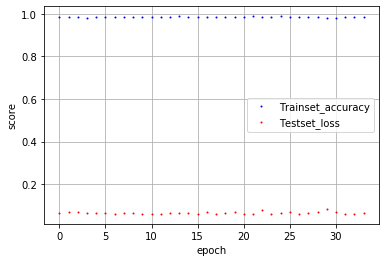

Accuracy : 0.9785


In [35]:
x_len = np.arange(len(y_acc))

# 학습셋 정확도 라인
plt.plot(x_len, y_acc, "o", c="blue", markersize=1, label="Trainset_accuracy")

# 테스트셋 오차 라인
plt.plot(x_len, y_vloss, "o", c="red", markersize=1, label='Testset_loss')

plt.legend(loc="best")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("score")

plt.show()


# 테스트 정확도 출력
print("Accuracy : %.4f" % y_val_accuracy[-1])